## Contents:
- 1) [Import Test Data](#Import-Test-Data)
- 2) [Data Dictionary](#Data-Dictionary)
- 3) [Clean Test Data](#Cleaning-Test-Data)
    - [Data Info](#Data-Info)
    - [Data Types](#Data-Type)
    - [Categorical Data cleaning](#Categorical-Data)
    - [Numerical Data cleaning](#Numerical-Data)
- 4) [Summary Statistics](#Summary-Statistics)
- 5) [Export Clean Data](#Export-Clean-Test-Data)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Test Data
[back to top](#Contents:)

In [2]:
housing_test = pd.read_csv("../datasets/test.csv")
pd.set_option('display.max_columns',None)

In [3]:
housing_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
housing_test.shape # Test data without sale price as saleprice will be target variable for prediction.

(878, 80)

In [5]:
housing_test.columns = housing_test.columns.str.lower().str.replace(' ', '_')

In [6]:
housing_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Data Dictionary
[back to top](#Contents:)
### As the data dictionary content of over 80 features, please refer to [link](https://www.kaggle.com/c/dsi-us-12-project-2-regression-challenge/data) to access the data dictionary.

## Cleaning Test Data
[back to top](#Contents:)

### Data Info

In [7]:
# Test Data
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

### Data Type

In [8]:
#Test Data
housing_test.dtypes.unique() # unique datatype values for our dataframe

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

### DataFrame ( missing_value, its percentage and data type for each column)

### Test Data

In [9]:
# Create a data frame to show columns with missing value and percentage for Test Data.

# 1) sort out null values for each column.
missing_value_test = housing_test.isnull().sum() 

# 2) percentage of missing value for each column.
percent_missing_test = housing_test.isnull().sum() * 100 / len(housing_test) # define

# 3) Data type for column with missing value.
data_type_test = housing_test.dtypes

# 3) Create a dataframe for number of missing values and total percentage per column.
missing_value_df_test = pd.DataFrame({'column_name': housing_test.columns,'missing_value':missing_value_test,
                                 'percent_missing': percent_missing_test,'data_type':data_type_test})

# 4) sort out the dataframe and display only values greater than 0.
missing_value_df_test.sort_values('percent_missing',inplace=True,ascending=False,ignore_index=True)
final_missing_df_test = missing_value_df_test[missing_value_df_test.missing_value > 0]
final_missing_df_test

,column_name,missing_value,percent_missing,data_type
0,pool_qc,874,99.544419,object
1,misc_feature,837,95.330296,object
2,alley,820,93.394077,object
3,fence,706,80.410023,object
4,fireplace_qu,422,48.063781,object
5,lot_frontage,160,18.223235,float64
6,garage_yr_blt,45,5.125285,float64
7,garage_finish,45,5.125285,object
8,garage_qual,45,5.125285,object
9,garage_cond,45,5.125285,object


### Dropping columns with  80% and above missing values (pool_qc, misc_feature,alley,fence)

## Test Data

In [10]:
housing_test.drop(columns=['pool_qc','misc_feature','alley','fence'],inplace=True)

In [11]:
housing_test.shape # successfully dropped 4 columns as the total column dropped from 80 to 76

(878, 76)

## Categorical Data
[back to top](#Contents:)
### Fill in all categorical data with mode function.
#### The mode of a set of data values is the value that appears most often.

In [12]:
# Fire place Quality

housing_test['fireplace_qu'] = housing_test['fireplace_qu'].fillna(housing_test['fireplace_qu'].mode()[0])
print(f'The Null value for fireplace quality is : {housing_test["fireplace_qu"].isna().sum()}')

The Null value for fireplace quality is : 0


In [13]:
# Garage features

housing_test['garage_finish'] = housing_test['garage_finish'].fillna(housing_test['garage_finish'].mode()[0])
print(f'The sum of null value for garage_finish : {housing_test["garage_finish"].isna().sum()}')

housing_test['garage_qual'] = housing_test['garage_qual'].fillna(housing_test['garage_qual'].mode()[0])
print(f'The sum of null value for garage_qual : {housing_test["garage_qual"].isna().sum()}')

housing_test['garage_cond'] = housing_test['garage_cond'].fillna(housing_test['garage_cond'].mode()[0])
print(f'The sum of null value for garage_cond : {housing_test["garage_cond"].isna().sum()}')

housing_test['garage_type'] = housing_test['garage_type'].fillna(housing_test['garage_type'].mode()[0])
print(f'The sum of null value for garage_type : {housing_test["garage_type"].isna().sum()}')

The sum of null value for garage_finish : 0
The sum of null value for garage_qual : 0
The sum of null value for garage_cond : 0
The sum of null value for garage_type : 0


In [14]:
# Basement features

housing_test['bsmt_exposure'] = housing_test['bsmt_exposure'].fillna(housing_test['bsmt_exposure'].mode()[0])
print(f'The sum of null value for bsmt_exposure : {housing_test["bsmt_exposure"].isna().sum()}')

housing_test['bsmtfin_type_2'] = housing_test['bsmtfin_type_2'].fillna(housing_test['bsmtfin_type_2'].mode()[0])
print(f'The sum of null value for bsmtfin_type_2 : {housing_test["bsmtfin_type_2"].isna().sum()}')

housing_test['bsmtfin_type_1'] = housing_test['bsmtfin_type_1'].fillna(housing_test['bsmtfin_type_1'].mode()[0])
print(f'The sum of null value for bsmtfin_type_1 : {housing_test["bsmtfin_type_1"].isna().sum()}')

housing_test['bsmt_cond'] = housing_test['bsmt_cond'].fillna(housing_test['bsmt_cond'].mode()[0])
print(f'The sum of null value for bsmt_cond : {housing_test["bsmt_cond"].isna().sum()}')

housing_test['bsmt_qual'] = housing_test['bsmt_qual'].fillna(housing_test['bsmt_qual'].mode()[0])
print(f'The sum of null value for bsmt_qual : {housing_test["bsmt_qual"].isna().sum()}')

The sum of null value for bsmt_exposure : 0
The sum of null value for bsmtfin_type_2 : 0
The sum of null value for bsmtfin_type_1 : 0
The sum of null value for bsmt_cond : 0
The sum of null value for bsmt_qual : 0


In [15]:
# Masonry Veneer type

housing_test['mas_vnr_type'] = housing_test['mas_vnr_type'].fillna(housing_test['mas_vnr_type'].mode()[0])
print(f'The sum of null value for mas_vnr_type : {housing_test["mas_vnr_type"].isna().sum()}')

The sum of null value for mas_vnr_type : 0


In [16]:
# Electrical system

housing_test['electrical'] = housing_test['electrical'].fillna(housing_test['electrical'].mode()[0])
print(f'The sum of null value for electrical : {housing_test["electrical"].isna().sum()}')

The sum of null value for electrical : 0


<AxesSubplot:>

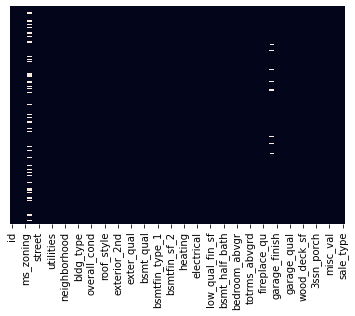

In [17]:
sns.heatmap(housing_test.isnull(),yticklabels=False,cbar=False)

### Observation: From the above heatmap observation we can see that we manage to fill in all the missing values for categorical data with mode() function.

## Numerical Data
[back to top](#Contents:)
### Fill in all the Numeric data with mean() function. It will fill in all the null values with mean value of that particular column.

In [18]:
# LotFrontage: Linear feet of street connected to property

housing_test['lot_frontage']=housing_test['lot_frontage'].fillna(housing_test['lot_frontage'].mean())
print(f'The sum of null value for lot_frontage : {housing_test["lot_frontage"].isna().sum()}')

The sum of null value for lot_frontage : 0


In [19]:
# MasVnrArea: Masonry veneer area in square feet

housing_test['mas_vnr_area']=housing_test['mas_vnr_area'].fillna(housing_test['mas_vnr_area'].mean())
print(f'The sum of null value for mas_vnr_area : {housing_test["mas_vnr_area"].isna().sum()}')

The sum of null value for mas_vnr_area : 0


<AxesSubplot:>

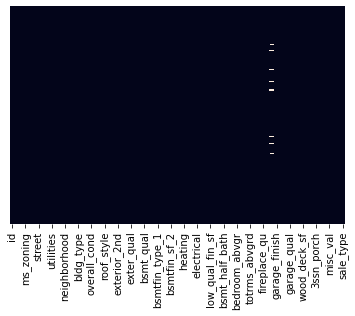

In [20]:
sns.heatmap(housing_test.isnull(),yticklabels=False,cbar=False)

In [21]:
# We will drop year built as there is low correlation.
housing_test.drop(['garage_yr_blt'],axis=1,inplace=True)

<AxesSubplot:>

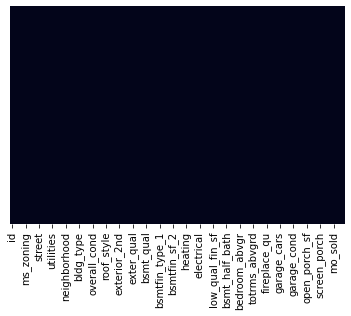

In [22]:
sns.heatmap(housing_test.isnull(),yticklabels=False,cbar=False)

## We manage to clean up the train data and fill in all the categorical value with mode function and numerical data with mean function.

In [23]:
housing_test.shape

(878, 75)

In [24]:
housing_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.000000,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Gd,Detchd,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Gd,Attchd,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Gd,Detchd,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD


## Summary Statistics
[back to top](#Contents:)

In [25]:
# Check for any unsual values for numerical data type.
housing_test.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,878.000000,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,21.279162,10002.674602,1.369065,1.128903,30.395895,20.450725,187.052173,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,60.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,69.545961,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,78.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,171.750000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


## Export Clean Test Data

In [26]:
housing_test.to_csv("../datasets/test_clean.csv")